<a href="https://colab.research.google.com/github/Ngum12/PeerPair-12-Neural-Network_Formative-II/blob/main/Ngum's_Neural_Network_Formative_II_Public_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [ ]:
#LOAD THE DATA
import pandas as pd

# Load dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv("/content/water_potability.csv")

# Display basic information about the dataset
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.

**Step 2: Data Preprocessing**


Handle missing values by filling them with the median of each column.

Normalize the features using StandardScaler.


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Handle missing values with median imputation
imputer = SimpleImputer(strategy="median")
df.iloc[:, :-1] = imputer.fit_transform(df.iloc[:, :-1])

# Normalize features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.iloc[:, :-1])

# Define the target variable
y = df["Potability"]


**Step 3: Data Splitting**

We split the data into training (70%), validation (15%), and testing (15%) sets.

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training (70%), validation (15%), and testing (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


**Step 4: Define the Neural Network (Adam Optimized)**

Key Improvements for Adam bold text

1 . Learning Rate: 0.0005 → prevents overshooting.

2 . Dropout Rate: 0.4 → 0.3 → 0.2 → combats overfitting.

3 . L2 Regularization (0.001) → prevents excessive weight growth.

3 . Batch Normalization → stabilizes training.

5 . Batch Size: 64 → balances training speed and stability.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Define the optimized Adam model
def create_adam_model():
    model = Sequential([
        Dense(128, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train.shape[1],)),
        BatchNormalization(),
        Dropout(0.4),

        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.3),

        Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.2),

        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    # Compile the model with Adam optimizer and a lower learning rate
    adam_optimizer = Adam(learning_rate=0.0005)
    model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Instantiate the model
adam_model = create_adam_model()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Step 5: Display the Neural Network Diagram**

To visualize the model architecture, use the plot_model() function.

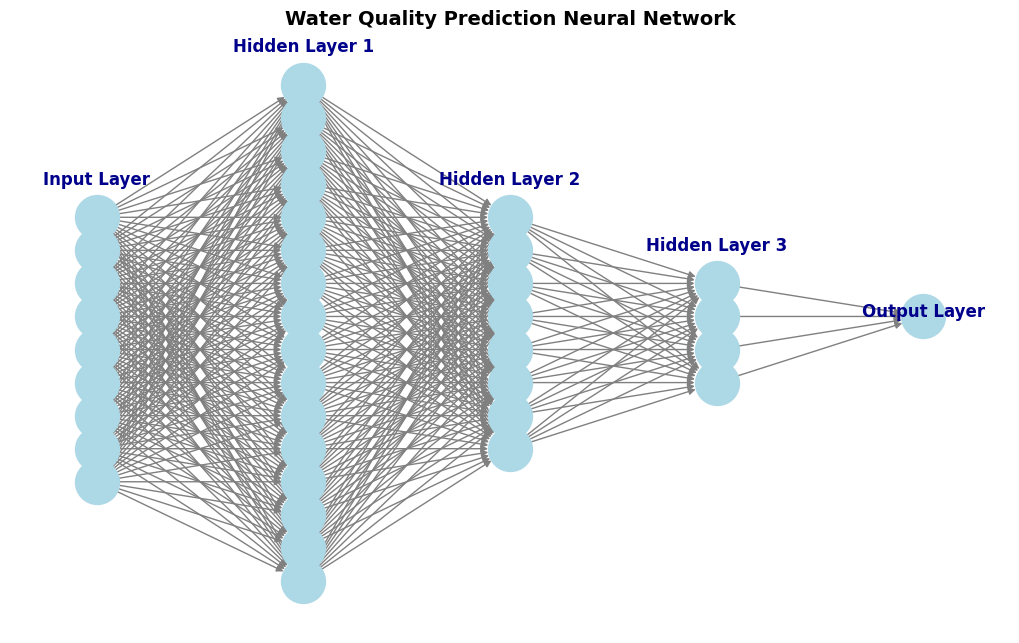

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_neural_network():
    layers = [
        ("Input Layer", 9),
        ("Hidden Layer 1", 16),
        ("Hidden Layer 2", 8),
        ("Hidden Layer 3", 4),
        ("Output Layer", 1)
    ]

    G = nx.DiGraph()
    layer_positions = {}
    x_spacing = 3
    y_spacing = 1
    x_offset = 0

    # Store y_positions for labeling later
    y_layer_positions = {}

    for layer_name, num_nodes in layers:
        if num_nodes == 1:
            y_positions = [0]  # Single-node layers (like Output Layer) should be centered
        else:
            y_positions = [y_spacing * i for i in range(-num_nodes // 2, num_nodes // 2)]

        y_layer_positions[layer_name] = y_positions  # Store for later use

        for y in y_positions:
            G.add_node((layer_name, y))
            layer_positions[(layer_name, y)] = (x_offset, y)

        x_offset += x_spacing

    # Connect layers
    for i in range(len(layers) - 1):
        current_layer, current_nodes = layers[i]
        next_layer, next_nodes = layers[i + 1]

        for y1 in y_layer_positions[current_layer]:
            for y2 in y_layer_positions[next_layer]:
                G.add_edge((current_layer, y1), (next_layer, y2))

    # Draw the neural network
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos=layer_positions, with_labels=False, node_color="lightblue", edge_color="gray", node_size=1000)

    # Add layer labels
    for layer_name in y_layer_positions.keys():
        x = x_offset - x_spacing if layer_name == "Output Layer" else layer_positions[(layer_name, y_layer_positions[layer_name][0])][0]
        y = max(y_layer_positions[layer_name]) + 1 if len(y_layer_positions[layer_name]) > 1 else 0
        plt.text(x, y, layer_name, fontsize=12, ha="center", fontweight="bold", color="darkblue")

    plt.title("Water Quality Prediction Neural Network", fontsize=14, fontweight="bold")
    plt.show() # This line was causing the error due to extra indentation. Removed extra indent

# Call the function to visualize the network
draw_neural_network()


**Step 6: Training the Adam Model**

**I'll use**

1. Early Stopping (patience=15) → stops training if validation loss doesn’t improve.

2. Learning Rate Decay (ReduceLROnPlateau) → halves learning rate if no improvement.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define callbacks
early_stopping = EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, verbose=1)

# Train the Adam-optimized model
history_adam = adam_model.fit(
    X_train, y_train, validation_data=(X_val, y_val),
    epochs=200, batch_size=64, callbacks=[early_stopping, lr_scheduler], verbose=1
)


Epoch 1/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.5017 - loss: 1.1444 - val_accuracy: 0.5580 - val_loss: 0.8254 - learning_rate: 5.0000e-04
Epoch 2/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5100 - loss: 0.9929 - val_accuracy: 0.6029 - val_loss: 0.8074 - learning_rate: 5.0000e-04
Epoch 3/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5400 - loss: 0.9367 - val_accuracy: 0.6293 - val_loss: 0.7986 - learning_rate: 5.0000e-04
Epoch 4/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5748 - loss: 0.9080 - val_accuracy: 0.6314 - val_loss: 0.7916 - learning_rate: 5.0000e-04
Epoch 5/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5837 - loss: 0.8695 - val_accuracy: 0.6232 - val_loss: 0.7860 - learning_rate: 5.0000e-04
Epoch 6/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6091 - loss: 0.8463 - val_accuracy: 0.6334 - val_loss: 0.7801 - learning_rate: 5.0000e-04
Epoch 7/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.

**Step 7: Model Evaluation**


1. F1-score, Precision, Recall, Accuracy

Compare results to other models


In [ ]:

from sklearn.metrics import classification_report

# Predict using the Adam model
y_pred_adam = (adam_model.predict(X_test) > 0.5).astype("int32")

# Print classification report
print("Optimized Adam Model Performance:")
print(classification_report(y_test, y_pred_adam))


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Optimized Adam Model Performance:
              precision    recall  f1-score   support

           0       0.72      0.86      0.78       307
           1       0.65      0.44      0.52       185

    accuracy                           0.70       492
   macro avg       0.68      0.65      0.65       492
weighted avg       0.69      0.70      0.68       492



**Step 8: Training & Validation Accuracy and Loss Plots**

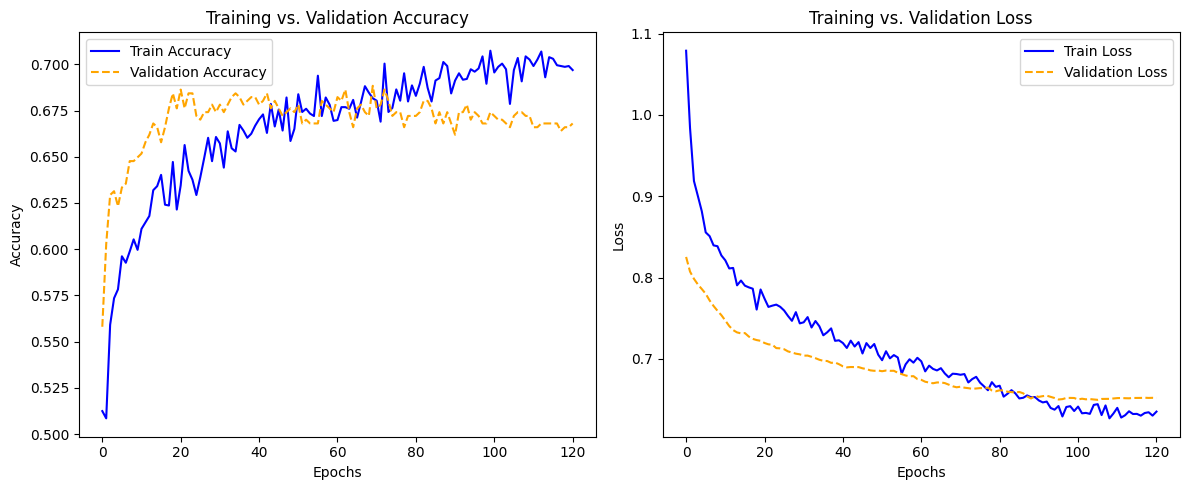

In [ ]:
import matplotlib.pyplot as plt

# Function to plot accuracy and loss curves
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linestyle='dashed')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training vs. Validation Accuracy")
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='dashed')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training vs. Validation Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot the results
plot_training_history(history_adam)


# **My Challenge Playground**

Fine-tune Hyperparameters

Adjust dropout: Increase or decrease dropout to control overfitting.

Change L2 regularization strength to control underfit and Overfit.

Modify learning rate: To stabilize learning rate

Try different batch sizes: Larger batch sizes often lead to smoother optimization but may generalize worse.


1. **Some screenshot so you get to understand the changes and struggle i when through trying to optimaze, Balance inbalance values and many other things i can not just mention the struggle**

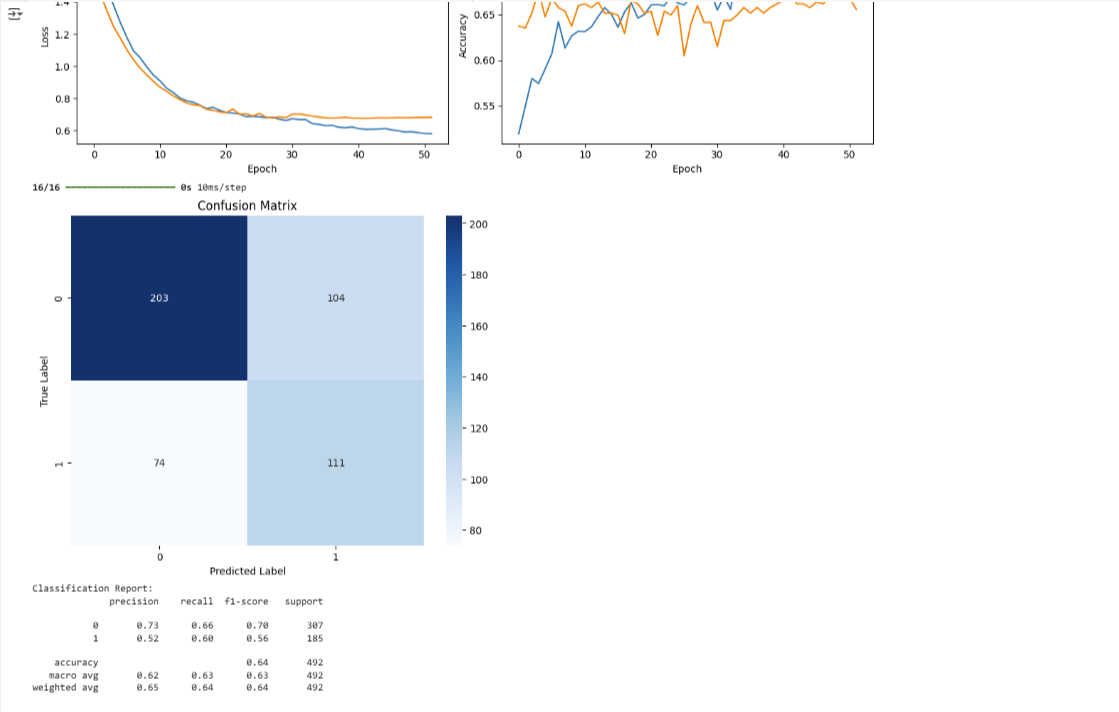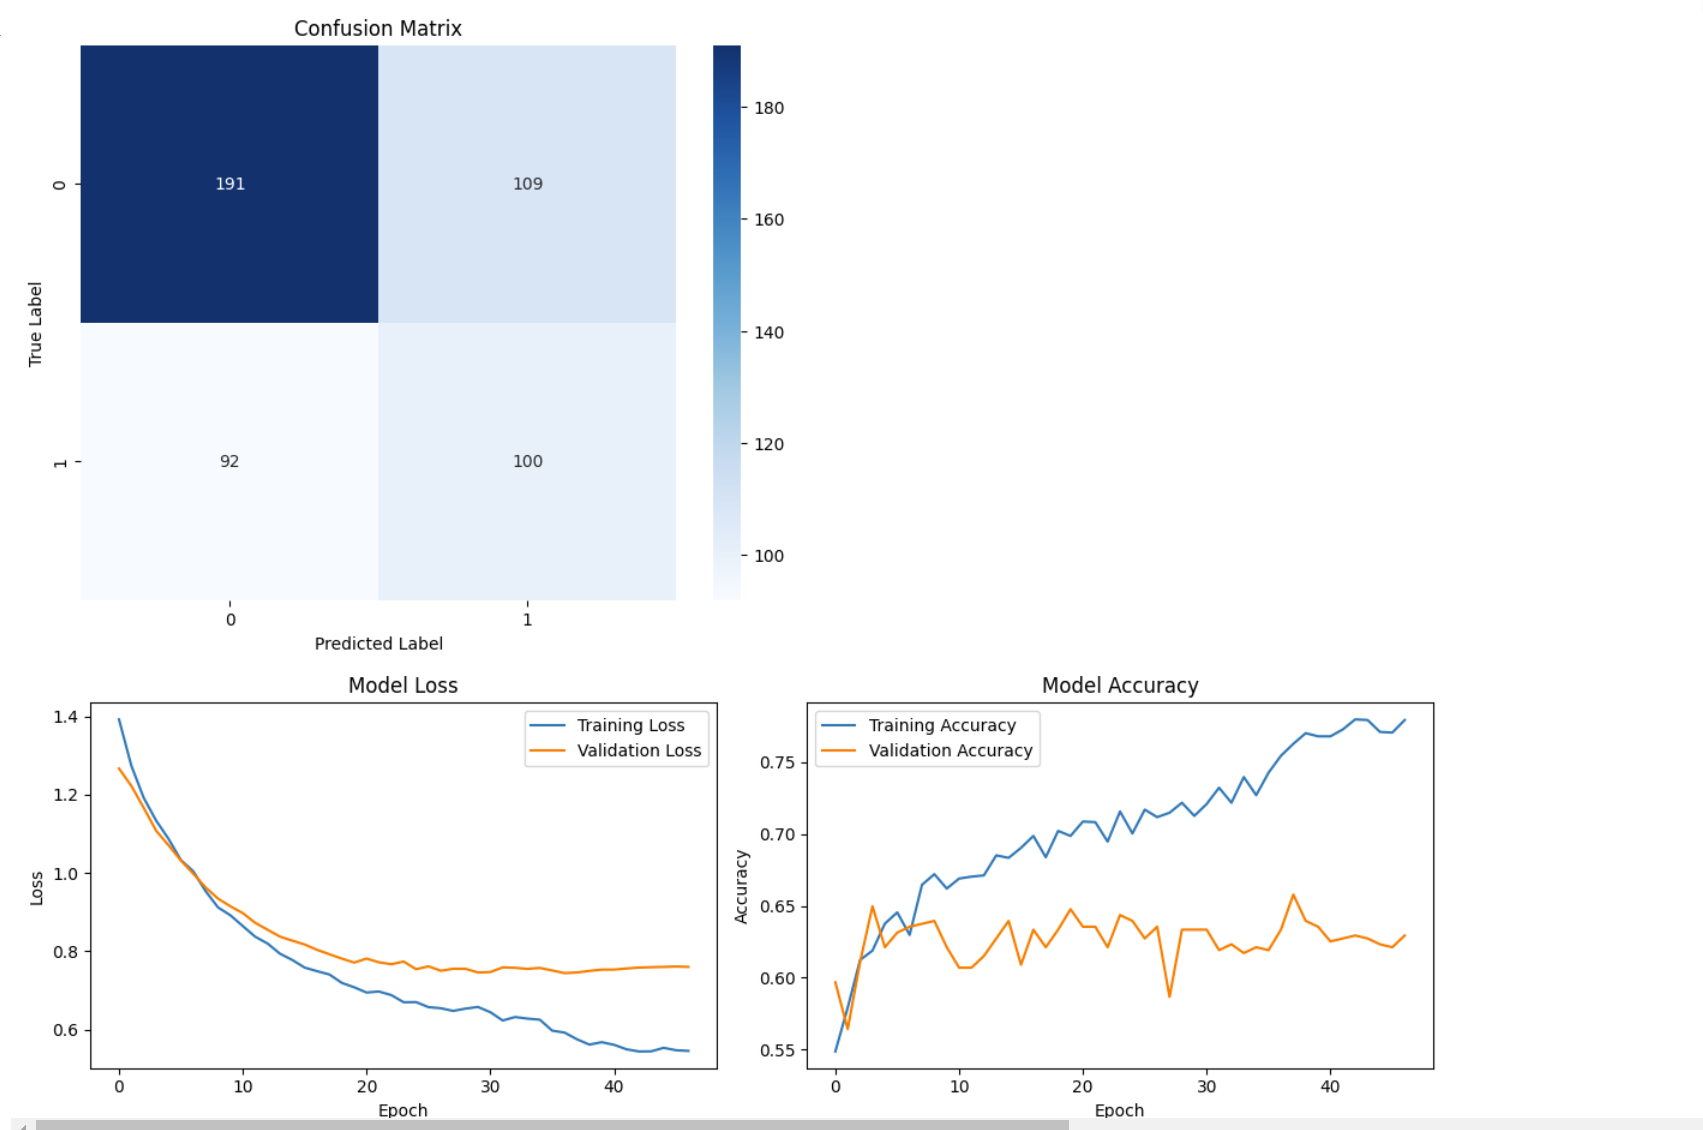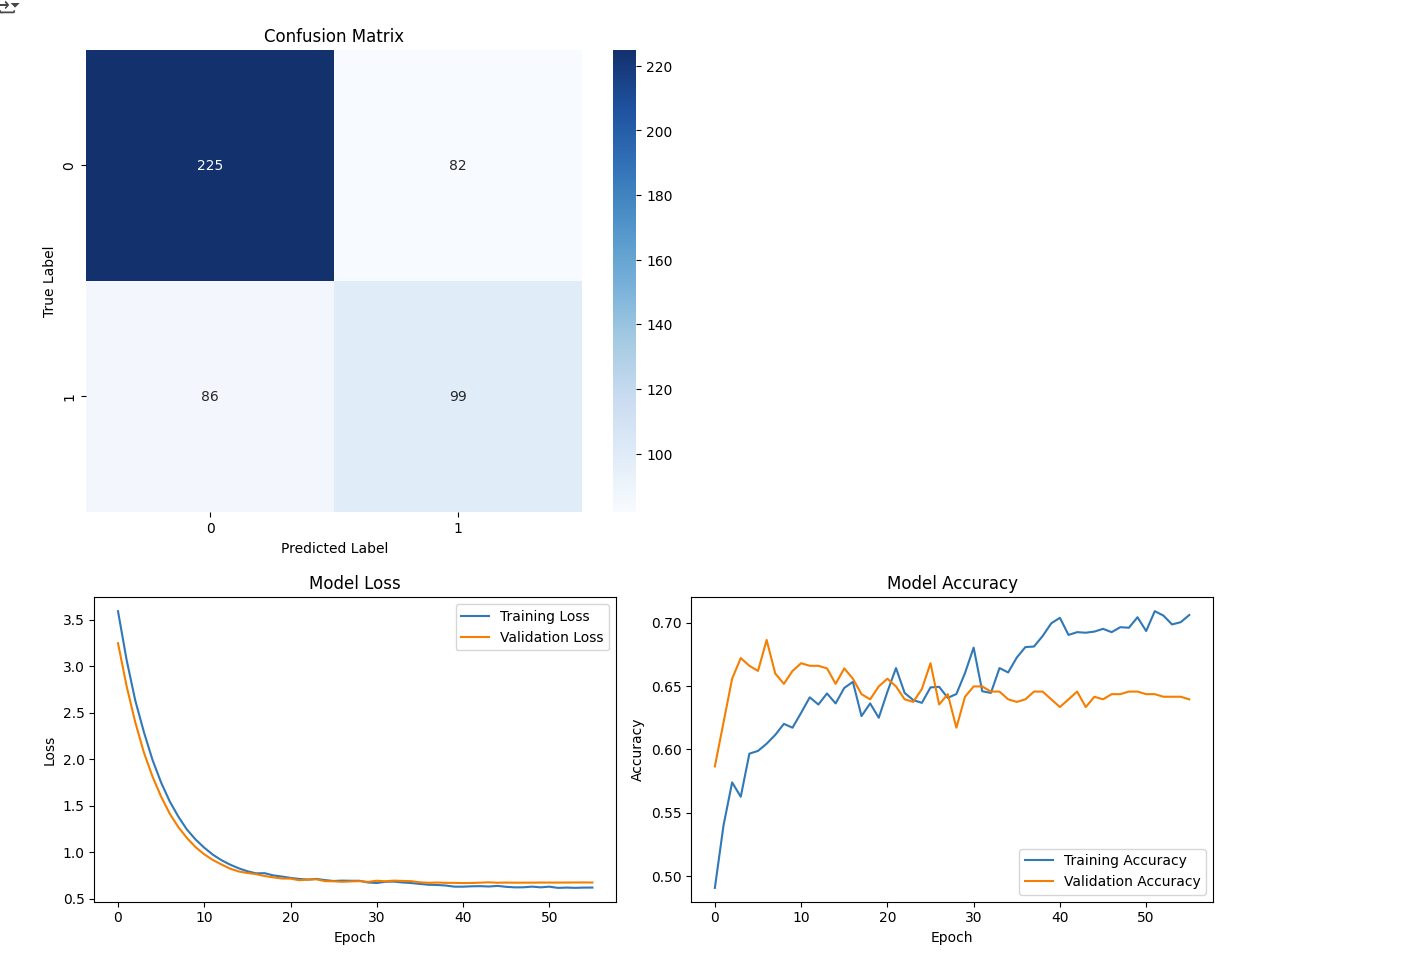

**Step 9. Let's save our model**

In [ ]:
import joblib
from tensorflow.keras.models import load_model

# Save the trained model
adam_model.save("water_potability_model.h5")

# Save the scaler for feature normalization
joblib.dump(scaler, "scaler.pkl")

# Save the class weights
joblib.dump(scaler, "scaler.pkl")

print("Model and preprocessing objects saved successfully!")



Model and preprocessing objects saved successfully!
